In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1=pd.read_csv('9k.csv')

In [3]:
df=data1.copy(deep=True)

In [4]:
df.head()

,Unnamed: 0,tweets,subjectivity,polarity,sentiment
0,0,b'@RexBrynen: Angus Reid poll: most Canadians ...,0.283333,0.250000,Positive
1,1,"b""@NjbBari Do emails in weeks, sent to parents...",0.000000,0.000000,Neutral
2,2,b'@nickrmanes: Great historical footnote dug u...,0.420833,0.158333,Positive
3,3,b'@NickSawyerMD: COVID- disinformation campaig...,0.100000,0.000000,Neutral
4,4,b'@DrEricDing: ) There have been more than m e...,0.611111,0.388889,Positive


In [5]:
df.drop(["subjectivity","polarity"],axis=1,inplace=True)

In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.20)

In [7]:
len(train), len(test)

(1413, 354)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

count_vectorization = CountVectorizer()
tfidf_transformation = TfidfTransformer()

In [9]:
X_train_count_vector = count_vectorization.fit_transform(train["tweets"])
X_train_tfidf_vector = tfidf_transformation.fit_transform(X_train_count_vector)

X_test_count_vector = count_vectorization.transform(test["tweets"])
X_test_tfidf_vector = tfidf_transformation.transform(X_test_count_vector)

y_train = train['sentiment']
y_test = test['sentiment']

In [10]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [11]:
model_prediction = dict()

In [52]:

model = SGDClassifier(max_iter=1000, tol=1e-3, loss="modified_huber").fit(X_train_tfidf_vector, y_train)
model_prediction['SVM-SGD'] = model.predict(X_test_tfidf_vector)


model = MultinomialNB().fit(X_train_tfidf_vector, y_train)
model_prediction['Multinomial'] = model.predict(X_test_tfidf_vector)


model = BernoulliNB().fit(X_train_tfidf_vector, y_train)
model_prediction['Bernoulli'] = model.predict(X_test_tfidf_vector)


model = LogisticRegression(C=1).fit(X_train_tfidf_vector, y_train)
model_prediction['Logistic'] = model.predict(X_test_tfidf_vector)

model = SVC(gamma='auto', C=1).fit(X_train_tfidf_vector, y_train)
model_prediction['SVM'] = model.predict(X_test_tfidf_vector)

model = DecisionTreeClassifier().fit(X_train_tfidf_vector, y_train)
model_prediction['Decision Tree'] = model.predict(X_test_tfidf_vector)

model=MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
model.fit(X_train_tfidf_vector, y_train)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [53]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
print("ACCURACY SCORE:\n")
for model_name in model_prediction.keys():
  print(model_name, ': ', round(accuracy_score(y_test, model_prediction[model_name])*100, 2))

ACCURACY SCORE:

SVM-SGD :  85.31
Multinomial :  78.25
Bernoulli :  82.77
Logistic :  84.75
SVM :  47.18
Decision Tree :  81.92


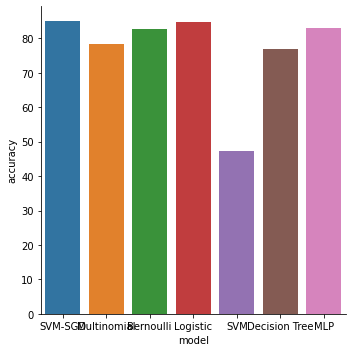

In [55]:
x=["SVM-SGD", "Multinomial", "Bernoulli", "Logistic", "SVM", "Decision Tree", "MLP"]
y=[85.03,78.25,82.77,84.75,47.18,76.88,83.0]
import seaborn as sns 
sns.catplot(x="model", y="accuracy", data=pd.DataFrame(list(zip(x,y)),columns=["model", "accuracy"]), kind="bar")
plt.show()

<AxesSubplot:xlabel='model', ylabel='accuracy'>

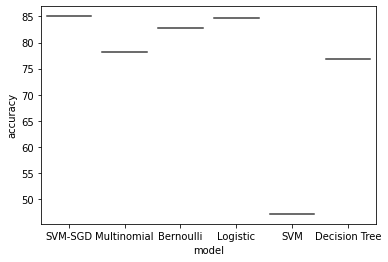

In [30]:
sns.boxenplot(x="model", y="accuracy", data=pd.DataFrame(list(zip(x,y)),columns=["model", "accuracy"]))

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(LogisticRegression(), param_grid)
grid.fit(X_train_tfidf_vector, y_train)

d:\Users\YASWANTH\anaconda3\envs\gr\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [35]:
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameter: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)


Best cross-validation score: 0.84
Best parameter:  {'C': 10}
Best estimator:  LogisticRegression(C=10)


In [39]:
import seaborn as sns

conf_mat = confusion_matrix(y_test, model_prediction['SVM'])



In [40]:
conf_mat

array([[  0,   0,  48],
       [  0,   0, 139],
       [  0,   0, 167]], dtype=int64)

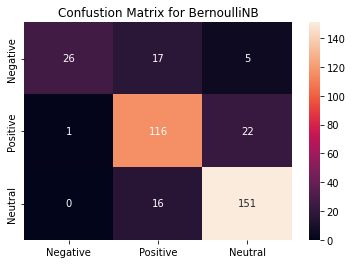

In [49]:
import seaborn as sns

conf_mat = confusion_matrix(y_test, model_prediction['Bernoulli'])
axes = ["Negative", "Positive","Neutral"]
confusion_matrix_df = pd.DataFrame(conf_mat, axes, axes, dtype=int)
sns.heatmap(confusion_matrix_df, annot=True, fmt="d")
plt.title("Confustion Matrix for BernoulliNB")
plt.show()

In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score,classification_report
classifer=MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=1000)
classifer.fit(X_train_tfidf_vector,y_train)
prediction=classifer.predict(X_test_tfidf_vector)
print(classification_report(y_test,prediction))
print("Accuracy:",accuracy_score(y_test,prediction)*100)



              precision    recall  f1-score   support

    Negative       0.71      0.73      0.72        48
     Neutral       0.84      0.77      0.80       139
    Positive       0.84      0.90      0.87       167

    accuracy                           0.82       354
   macro avg       0.80      0.80      0.80       354
weighted avg       0.83      0.82      0.82       354

Accuracy: 82.48587570621469
